In [3]:
#uploading the data.csv using pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
file_path = 'data.csv'
df = pd.read_csv(file_path)



In [4]:
df['class']

0       NO
1       NO
2       NO
3       NO
4      YES
      ... 
287    YES
288     NO
289    YES
290    YES
291     NO
Name: class, Length: 292, dtype: object

In [5]:
#trying to add or remove the columns to see if it will improve the model
df['total_autism_score'] = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']].sum(axis=1)

df.drop('age_desc', axis=1, inplace=True)

In [6]:
#see how many null values are in each column
print(df.isnull().sum())

df.to_csv('data_cleaned.csv', index=False)

A1_Score               0
A2_Score               0
A3_Score               0
A4_Score               0
A5_Score               0
A6_Score               0
A7_Score               0
A8_Score               0
A9_Score               0
A10_Score              0
age                    4
gender                 0
ethnicity             43
jaundice               0
autism                 0
country_of_res         0
used_app_before        0
result                 0
relation              43
class                  0
total_autism_score     0
dtype: int64


In [7]:
#in the 4 age columns, there are 4 missing values. I will fill them with the mean of the column
df['age'].fillna(df['age'].mean(), inplace=True)
#in ethnicity, there are 43 missing values. I will fill them with the mode of the column, since they are categorical, i will ad as "unknown"
df['ethnicity'].fillna('unknown', inplace=True)
#in relation, there are 6\43 missing values. I will fill them with the mode of the column, since they are categorical, i will ad as "unknown"
df['relation'].fillna('unknown', inplace=True)

C:\Users\ssghi\AppData\Local\Temp\ipykernel_27944\1911155536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\ssghi\AppData\Local\Temp\ipykernel_27944\1911155536.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [8]:
df['class']

0       NO
1       NO
2       NO
3       NO
4      YES
      ... 
287    YES
288     NO
289    YES
290    YES
291     NO
Name: class, Length: 292, dtype: object

We used mean for age null values. There were only 4 null values so we used mean. For the other categorical values we just put in unknown as there isnt a way to just guesstimate the ethnicity and relation. 

In [9]:
df['age_autism_interaction'] = df['age'] * df['total_autism_score']/2

In [10]:
df['class'] = df['class'].map({'NO': 0, 'YES': 1})
y = df['class']

X = df.drop('class', axis=1)
X['gender'] = X['gender'].map({'M': 0, 'F': 1})
X['jaundice'] = X['jaundice'].map({'no': 0, 'yes': 1})
X['autism'] = X['autism'].map({'no': 0, 'yes': 1})
X['used_app_before'] = X['used_app_before'].map({'no': 0, 'yes': 1})
#drop gender column


In [11]:
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['ethnicity', 'country_of_res', 'relation'], dtype='object')

For categorical data types which are binary, we are just using binary encoding. The columns like gender, jaundice, autism, used_app_before,class only have two categorical values in them. So we used 1 and 0 for the values. 

In [12]:
#one hot encoding categorical columns remaining 
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True,dtype=int)

One hot encoding was used for all the other categorical values as they have more than 2 categories in them. 

In [13]:
categorical_cols = X.select_dtypes(include=['object']).columns

In [14]:
X.drop("result", axis=1, inplace=True)

In [15]:
#rename columns 
X = X.rename(columns={
    'A1_Score': 'Notices_Sounds_A1',
    'A2_Score': 'Whole_Picture_A2',
    'A3_Score': 'Tracks_Conversations_A3',
    'A4_Score': 'Switch_Activities_A4',
    'A5_Score': 'Conversation_Struggle_A5',
    'A6_Score': 'Social_ChitChat_A6',
    'A7_Score': 'Understands_Intentions_A7',
    'A8_Score': 'Pretend_Play_A8',
    'A9_Score': 'Understands_Emotions_A9',
    'A10_Score': 'Makes_Friends_Easily_A10',
})

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [17]:
y_train

210    1
229    1
226    0
73     1
25     0
      ..
188    0
71     0
106    1
270    1
102    0
Name: class, Length: 233, dtype: int64

For Validation purposes we are using 20% of data for testing our model. 

In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

Accuracy: 1.0000
F1 Score: 1.0000


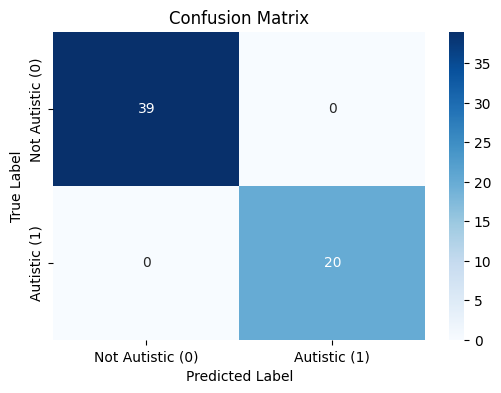

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        20

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



C:\Users\ssghi\AppData\Local\Temp\ipykernel_27944\1820629439.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=features, palette='viridis')


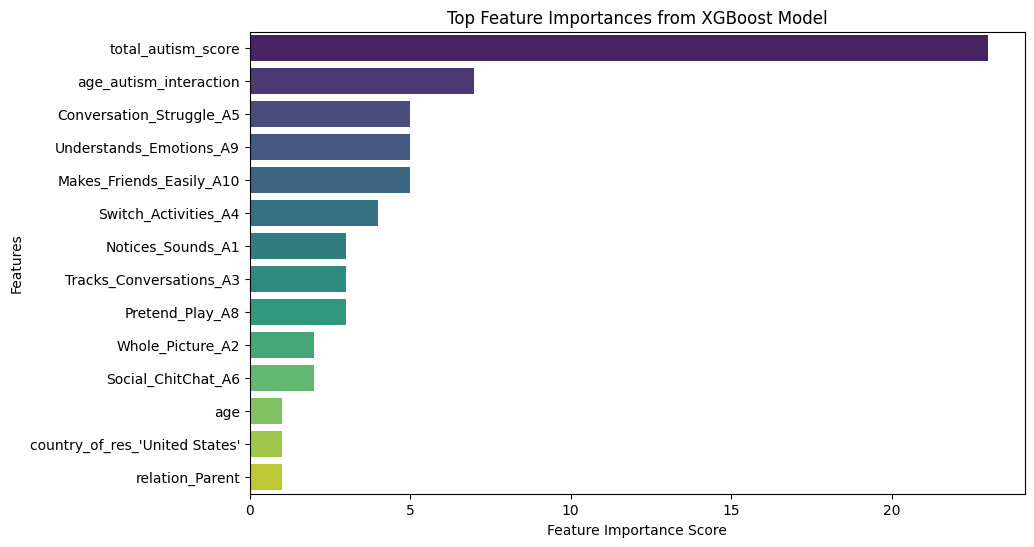

In [19]:
model = xgb.XGBClassifier(subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=2.5, colsample_bytree=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Autistic (0)', 'Autistic (1)'], yticklabels=['Not Autistic (0)', 'Autistic (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


def plot_feature_importance(model, top_n=20):
    # Get feature importance scores
    importance_dict = model.get_booster().get_score(importance_type='weight')
    
    # Convert to sorted list
    sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
    
    # Extract top features
    top_features = sorted_importance[:top_n]
    features, scores = zip(*top_features)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=scores, y=features, palette='viridis')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Top Feature Importances from XGBoost Model")
    plt.show()

# Example usage
# Assuming 'model' is your trained XGBoost model
plot_feature_importance(model)
#export the feature importance to a csv file
importance_dict = model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.to_csv('feature_importance.csv', index=False)



The hyperparameters used are found by using the tuning data from the code box result below.

We first used xgBoost because when Olivier did its presentation last week we thought it would be a really good model to try out. Since we knew that autism cases are not prevalent in real world. We wanted to emphasize on F1 score than on accuracy. 

When doing the hyperparameters tuning we could see that the given details does give really good answers. It really does have accuracy of 100% and this is validation on test dataset. So this already is a really good score so i didnt have any other reason to try another model. We might argue that this is because of overfitting but since we are looking at different data to validate our model and the model having a good score even on that model means that this is a good thing and sufficient model 


Accuracy: 1.0000
F1 Score: 1.0000


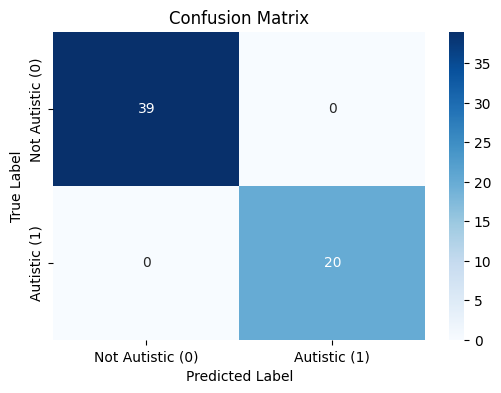

In [20]:
#now using random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)  
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  
            xticklabels=['Not Autistic (0)', 'Autistic (1)'], 
            yticklabels=['Not Autistic (0)', 'Autistic (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Random forest works pretty well too. Without tuning the hyperparameters. f1 score and accuracy is pretty good. 

In [21]:
#storing the model using pickle
import pickle
model_filename = 'xgboost_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)


In [22]:
#Streamlit app deployment
import streamlit as st

In [23]:

def get_user_input():
    st.title("Autism Prediction App")
    
    # User input fields
    age = st.number_input("Age", min_value=0, max_value=20, value=10)
    Notices_Sounds_A1 = st.number_input("Notices Sounds (A1)", min_value=0, max_value=1, value=1)
    Whole_Picture_A2 = st.number_input("Whole Picture (A2)", min_value=0, max_value=1, value=1)
    Tracks_Conversations_A3 = st.number_input("Tracks Conversations (A3)", min_value=0, max_value=1, value=1)
    Switch_Activities_A4 = st.number_input("Switch Activities (A4)", min_value=0, max_value=1, value=1)
    Conversation_Struggle_A5 = st.number_input("Conversation Struggle (A5)", min_value=0, max_value=1, value=1)
    Social_ChitChat_A6 = st.number_input("Social ChitChat (A6)", min_value=0, max_value=1, value=1)
    Understands_Intentions_A7 = st.number_input("Understands Intentions (A7)", min_value=0, max_value=1, value=1)
    Pretend_Play_A8 = st.number_input("Pretend Play (A8)", min_value=0, max_value=1, value=1)
    Understands_Emotions_A9 = st.number_input("Understands Emotions (A9)", min_value=0, max_value=1, value=1)  
    Makes_Friends_Easily_A10 = st.number_input("Makes Friends Easily (A10)", min_value=0, max_value=1, value=1)
    jaundice = st.selectbox("Jaundice", options=["no", "yes"])
    autism = st.selectbox("Autism", options=["no", "yes"])
    used_app_before = st.selectbox("Used App Before", options=["no", "yes"])
    total_autism_score = Notices_Sounds_A1 + Whole_Picture_A2 + Tracks_Conversations_A3 + Switch_Activities_A4 + Conversation_Struggle_A5 + Social_ChitChat_A6 + Understands_Intentions_A7 + Pretend_Play_A8 + Understands_Emotions_A9 + Makes_Friends_Easily_A10
    age_autism_interaction = age * total_autism_score / 2
    gender = st.selectbox("Gender", options=["Male", "Female"])
    ethnicity = st.selectbox("Ethnicity", options=["White", "Asian", "Black", "Hispanic","Latino",'Middle Eastern',"South Asian","Turkish","White-European","Pasifika","Others","Unknown"])
    country_options = sorted([
    "Afghanistan", "Argentina", "Armenia", "Australia", "Austria", "Bahrain", "Bangladesh", "Bhutan",
    "Brazil", "Bulgaria", "Canada", "China", "Costa Rica", "Egypt", "Europe", "Georgia", "Germany",
    "Ghana", "India", "Iraq", "Ireland", "'Isle of Man'", "Italy", "Japan", "Jordan", "Kuwait", "Latvia",
    "Lebanon", "Libya", "Malaysia", "Malta", "Mexico", "Nepal", "Netherlands", "'New Zealand'", "Nigeria",
    "Oman", "Pakistan", "Philippines", "Qatar", "Romania", "Russia", "'Saudi Arabia'", "'South Africa'",
    "'South Korea'", "Sweden", "Syria", "Turkey", "'U.S. Outlying Islands'", "'United Arab Emirates'",
    "'United Kingdom'", "'United States'"
    ])
    country_of_resi = st.selectbox("Country of Residence", options=country_options)
    relation = st.selectbox("Relation", options=["Parent", "Self", "Relative","self", "unknown"])
    user_data = {
        'age': age,
        'Notices_Sounds_A1': Notices_Sounds_A1,
        'Whole_Picture_A2': Whole_Picture_A2,
        'Tracks_Conversations_A3': Tracks_Conversations_A3,
        'Switch_Activities_A4': Switch_Activities_A4,
        'Conversation_Struggle_A5': Conversation_Struggle_A5,
        'Social_ChitChat_A6': Social_ChitChat_A6,
        'Understands_Intentions_A7': Understands_Intentions_A7,
        'Pretend_Play_A8': Pretend_Play_A8,
        'Understands_Emotions_A9': Understands_Emotions_A9,
        'Makes_Friends_Easily_A10': Makes_Friends_Easily_A10,
        'jaundice': 1 if jaundice == "yes" else 0,
        'autism': 1 if autism == "yes" else 0,
        'used_app_before': 1 if used_app_before == "yes" else 0,
        'total_autism_score': total_autism_score,
        'age_autism_interaction': age_autism_interaction,
        'gender_m':1 if gender == "M" else 0,
        f'country_of_res_{country_of_resi}':1,
        f'ethnicity_{ethnicity}':1,
        f'relation_{relation}':1,
    }
    return user_data
user_data = get_user_input()
user_data




2025-04-28 15:20:52.971 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2025-04-28 15:20:53.749 
  command:

    streamlit run C:\Users\ssghi\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-28 15:20:53.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:53.752 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:53.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:53.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:53.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:53.756 Session state does not function when running a script without `streamlit run`
2025-04-28 15:20:53.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in ba

{'age': 10,
 'Notices_Sounds_A1': 1,
 'Whole_Picture_A2': 1,
 'Tracks_Conversations_A3': 1,
 'Switch_Activities_A4': 1,
 'Conversation_Struggle_A5': 1,
 'Social_ChitChat_A6': 1,
 'Understands_Intentions_A7': 1,
 'Pretend_Play_A8': 1,
 'Understands_Emotions_A9': 1,
 'Makes_Friends_Easily_A10': 1,
 'jaundice': 0,
 'autism': 0,
 'used_app_before': 0,
 'total_autism_score': 10,
 'age_autism_interaction': 50.0,
 'gender_m': 0,
 "country_of_res_'Isle of Man'": 1,
 'ethnicity_White': 1,
 'relation_Parent': 1}

In [24]:
#transform the user input into a dataframe
def prepare_input(data,feature_list):
    input_data = {feature:data.get(feature,0) for feature in feature_list}
    return np.array([list(input_data.values())])
feature_list = X.columns.tolist()
input_data = prepare_input(user_data, feature_list)
input_data = pd.DataFrame(input_data, columns=feature_list)

In [25]:
prediction = model.predict(input_data)
prediction


array([1])

In [26]:
X_train.columns

Index(['Notices_Sounds_A1', 'Whole_Picture_A2', 'Tracks_Conversations_A3',
       'Switch_Activities_A4', 'Conversation_Struggle_A5',
       'Social_ChitChat_A6', 'Understands_Intentions_A7', 'Pretend_Play_A8',
       'Understands_Emotions_A9', 'Makes_Friends_Easily_A10', 'age', 'gender',
       'jaundice', 'autism', 'used_app_before', 'total_autism_score',
       'age_autism_interaction', 'ethnicity_'South Asian'', 'ethnicity_Asian',
       'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino',
       'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish',
       'ethnicity_White-European', 'ethnicity_unknown',
       'country_of_res_'Isle of Man'', 'country_of_res_'New Zealand'',
       'country_of_res_'Saudi Arabia'', 'country_of_res_'South Africa'',
       'country_of_res_'South Korea'',
       'country_of_res_'U.S. Outlying Islands'',
       'country_of_res_'United Arab Emirates'',
       'country_of_res_'United Kingdom'', 'country_of_res_'United States'',
       'cou

In [ ]:
#creating the app 
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
st.set_page_config(page_title="Autism Prediction App", page_icon=":guardsman:", layout="wide")

model_filename = 'xgboost_model.pkl'
with open(model_filename, 'rb') as file:
    lm2 = pickle.load(file)

#load feature importance
def load_feature_importance():
    try:
        importance_df = pd.read_csv('feature_importance.csv')
        return importance_df
    except FileNotFoundError:
        st.error("Feature importance file not found.")
        return None
    
#sidebar 
image_sidebar = Image.open('autism.png')
st.sidebar.image(image_sidebar, use_column_width=True)
st.sidebar.header("Autism Prediction App")

#feature selection on sidebar

def get_user_input():
    st.title("Autism Prediction App")
    
    # User input fields
    age = st.number_input("Age", min_value=0, max_value=20, value=10)
    Notices_Sounds_A1 = st.number_input("Notices Sounds (A1)", min_value=0, max_value=1, value=1)
    Whole_Picture_A2 = st.number_input("Whole Picture (A2)", min_value=0, max_value=1, value=1)
    Tracks_Conversations_A3 = st.number_input("Tracks Conversations (A3)", min_value=0, max_value=1, value=1)
    Switch_Activities_A4 = st.number_input("Switch Activities (A4)", min_value=0, max_value=1, value=1)
    Conversation_Struggle_A5 = st.number_input("Conversation Struggle (A5)", min_value=0, max_value=1, value=1)
    Social_ChitChat_A6 = st.number_input("Social ChitChat (A6)", min_value=0, max_value=1, value=1)
    Understands_Intentions_A7 = st.number_input("Understands Intentions (A7)", min_value=0, max_value=1, value=1)
    Pretend_Play_A8 = st.number_input("Pretend Play (A8)", min_value=0, max_value=1, value=1)
    Understands_Emotions_A9 = st.number_input("Understands Emotions (A9)", min_value=0, max_value=1, value=1)  
    Makes_Friends_Easily_A10 = st.number_input("Makes Friends Easily (A10)", min_value=0, max_value=1, value=1)
    jaundice = st.selectbox("Jaundice", options=["no", "yes"])
    autism = st.selectbox("Autism", options=["no", "yes"])
    used_app_before = st.selectbox("Used App Before", options=["no", "yes"])
    total_autism_score = Notices_Sounds_A1 + Whole_Picture_A2 + Tracks_Conversations_A3 + Switch_Activities_A4 + Conversation_Struggle_A5 + Social_ChitChat_A6 + Understands_Intentions_A7 + Pretend_Play_A8 + Understands_Emotions_A9 + Makes_Friends_Easily_A10
    age_autism_interaction = age * total_autism_score / 2
    gender = st.selectbox("Gender", options=["Male", "Female"])
    ethnicity = st.selectbox("Ethnicity", options=["White", "Asian", "Black", "Hispanic","Latino",'Middle Eastern',"South Asian","Turkish","White-European","Pasifika","Others","Unknown"])
    country_options = sorted([
    "Afghanistan", "Argentina", "Armenia", "Australia", "Austria", "Bahrain", "Bangladesh", "Bhutan",
    "Brazil", "Bulgaria", "Canada", "China", "Costa Rica", "Egypt", "Europe", "Georgia", "Germany",
    "Ghana", "India", "Iraq", "Ireland", "'Isle of Man'", "Italy", "Japan", "Jordan", "Kuwait", "Latvia",
    "Lebanon", "Libya", "Malaysia", "Malta", "Mexico", "Nepal", "Netherlands", "'New Zealand'", "Nigeria",
    "Oman", "Pakistan", "Philippines", "Qatar", "Romania", "Russia", "'Saudi Arabia'", "'South Africa'",
    "'South Korea'", "Sweden", "Syria", "Turkey", "'U.S. Outlying Islands'", "'United Arab Emirates'",
    "'United Kingdom'", "'United States'"
    ])
    country_of_resi = st.selectbox("Country of Residence", options=country_options)
    relation = st.selectbox("Relation", options=["Parent", "Self", "Relative","self", "unknown"])
    user_data = {
        'age': age,
        'Notices_Sounds_A1': Notices_Sounds_A1,
        'Whole_Picture_A2': Whole_Picture_A2,
        'Tracks_Conversations_A3': Tracks_Conversations_A3,
        'Switch_Activities_A4': Switch_Activities_A4,
        'Conversation_Struggle_A5': Conversation_Struggle_A5,
        'Social_ChitChat_A6': Social_ChitChat_A6,
        'Understands_Intentions_A7': Understands_Intentions_A7,
        'Pretend_Play_A8': Pretend_Play_A8,
        'Understands_Emotions_A9': Understands_Emotions_A9,
        'Makes_Friends_Easily_A10': Makes_Friends_Easily_A10,
        'jaundice': 1 if jaundice == "yes" else 0,
        'autism': 1 if autism == "yes" else 0,
        'used_app_before': 1 if used_app_before == "yes" else 0,
        'total_autism_score': total_autism_score,
        'age_autism_interaction': age_autism_interaction,
        'gender':1 if gender == "M" else 0,
        f'country_of_res_{country_of_resi}':1,
        f'ethnicity_{ethnicity}':1,
        f'relation_{relation}':1,
    }
    return user_data

st.markdown("<h1 style='text-align: center;'>Autism prediction</h1>")
left_column, right_column = st.columns(2)
with left_column:
    st.header("Feature Importance")

with right_column:
    st.header("Model Performance")
    user_data = get_user_input()
    #transform the user input into a dataframe
    def prepare_input(data,feature_list):
        input_data = {feature:data.get(feature,0) for feature in feature_list}
        return np.array([list(input_data.values())])
    features = [
    "Notices_Sounds_A1",
    "Whole_Picture_A2",
    "Tracks_Conversations_A3",
    "Switch_Activities_A4",
    "Conversation_Struggle_A5",
    "Social_ChitChat_A6",
    "Understands_Intentions_A7",
    "Pretend_Play_A8",
    "Understands_Emotions_A9",
    "Makes_Friends_Easily_A10",
    "age",
    "jaundice",
    "autism",
    "used_app_before",
    "total_autism_score",
    "age_autism_interaction",
    "gender",
    "ethnicity_'South Asian'",
    "ethnicity_Asian",
    "ethnicity_Black",
    "ethnicity_Hispanic",
    "ethnicity_Latino",
    "ethnicity_Others",
    "ethnicity_Pasifika",
    "ethnicity_Turkish",
    "ethnicity_White-European",
    "ethnicity_unknown",
    "country_of_res_'Isle of Man'",
    "country_of_res_'New Zealand'",
    "country_of_res_'Saudi Arabia'",
    "country_of_res_'South Africa'",
    "country_of_res_'South Korea'",
    "country_of_res_'U.S. Outlying Islands'",
    "country_of_res_'United Arab Emirates'",
    "country_of_res_'United Kingdom'",
    "country_of_res_'United States'",
    "country_of_res_Afghanistan",
    "country_of_res_Argentina",
    "country_of_res_Armenia",
    "country_of_res_Australia",
    "country_of_res_Austria",
    "country_of_res_Bahrain",
    "country_of_res_Bangladesh",
    "country_of_res_Bhutan",
    "country_of_res_Brazil",
    "country_of_res_Bulgaria",
    "country_of_res_Canada",
    "country_of_res_China",
    "country_of_res_Egypt",
    "country_of_res_Europe",
    "country_of_res_Georgia",
    "country_of_res_Germany",
    "country_of_res_Ghana",
    "country_of_res_India",
    "country_of_res_Iraq",
    "country_of_res_Ireland",
    "country_of_res_Italy",
    "country_of_res_Japan",
    "country_of_res_Jordan",
    "country_of_res_Kuwait",
    "country_of_res_Latvia",
    "country_of_res_Lebanon",
    "country_of_res_Libya",
    "country_of_res_Malaysia",
    "country_of_res_Malta",
    "country_of_res_Mexico",
    "country_of_res_Nepal",
    "country_of_res_Netherlands",
    "country_of_res_Nigeria",
    "country_of_res_Oman",
    "country_of_res_Pakistan",
    "country_of_res_Philippines",
    "country_of_res_Qatar",
    "country_of_res_Romania",
    "country_of_res_Russia",
    "country_of_res_Sweden",
    "country_of_res_Syria",
    "country_of_res_Turkey",
    "relation_Parent",
    "relation_Relative",
    "relation_Self",
    "relation_self",
    "relation_unknown"
    ]
    if st.button("Predict"):
        input_data = prepare_input(user_data, features)
        prediction = lm2.predict(input_data)
        st.write(f"Prediction: {'Autistic' if prediction[0] == 1 else 'Not Autistic'}")

    

    



2025-04-28 15:20:54.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:54.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:54.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:54.132 The `use_column_width` parameter has been deprecated and will be removed in a future release. Please utilize the `use_container_width` parameter instead.
2025-04-28 15:20:54.133 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:54.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:54.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:20:54.188 Thread 'MainThread': missing ScriptRunCont

In [30]:
len(features)

84

In [31]:
X_test.columns.tolist()


['Notices_Sounds_A1',
 'Whole_Picture_A2',
 'Tracks_Conversations_A3',
 'Switch_Activities_A4',
 'Conversation_Struggle_A5',
 'Social_ChitChat_A6',
 'Understands_Intentions_A7',
 'Pretend_Play_A8',
 'Understands_Emotions_A9',
 'Makes_Friends_Easily_A10',
 'age',
 'gender',
 'jaundice',
 'autism',
 'used_app_before',
 'total_autism_score',
 'age_autism_interaction',
 "ethnicity_'South Asian'",
 'ethnicity_Asian',
 'ethnicity_Black',
 'ethnicity_Hispanic',
 'ethnicity_Latino',
 'ethnicity_Others',
 'ethnicity_Pasifika',
 'ethnicity_Turkish',
 'ethnicity_White-European',
 'ethnicity_unknown',
 "country_of_res_'Isle of Man'",
 "country_of_res_'New Zealand'",
 "country_of_res_'Saudi Arabia'",
 "country_of_res_'South Africa'",
 "country_of_res_'South Korea'",
 "country_of_res_'U.S. Outlying Islands'",
 "country_of_res_'United Arab Emirates'",
 "country_of_res_'United Kingdom'",
 "country_of_res_'United States'",
 'country_of_res_Afghanistan',
 'country_of_res_Argentina',
 'country_of_res_Arm

In [ ]:
#commiting after changes by trying streamlit and xgboost tuning